In [ ]:
!pip install download
!pip install fbprophet --upgrade
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

Requirement already up-to-date: fbprophet in /usr/local/lib/python3.7/dist-packages (0.7.1)
Uninstalling scikit-learn-0.24.2:
  Successfully uninstalled scikit-learn-0.24.2
  Using cached https://files.pythonhosted.org/packages/a8/eb/a48f25c967526b66d5f1fa7a984594f0bf0a5afafa94a8c4dbc317744620/scikit_learn-0.24.2-cp37-cp37m-manylinux2010_x86_64.whl


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

import pandas as pd

from download import download


mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/stock/SHA_d.csv')
values = df.values

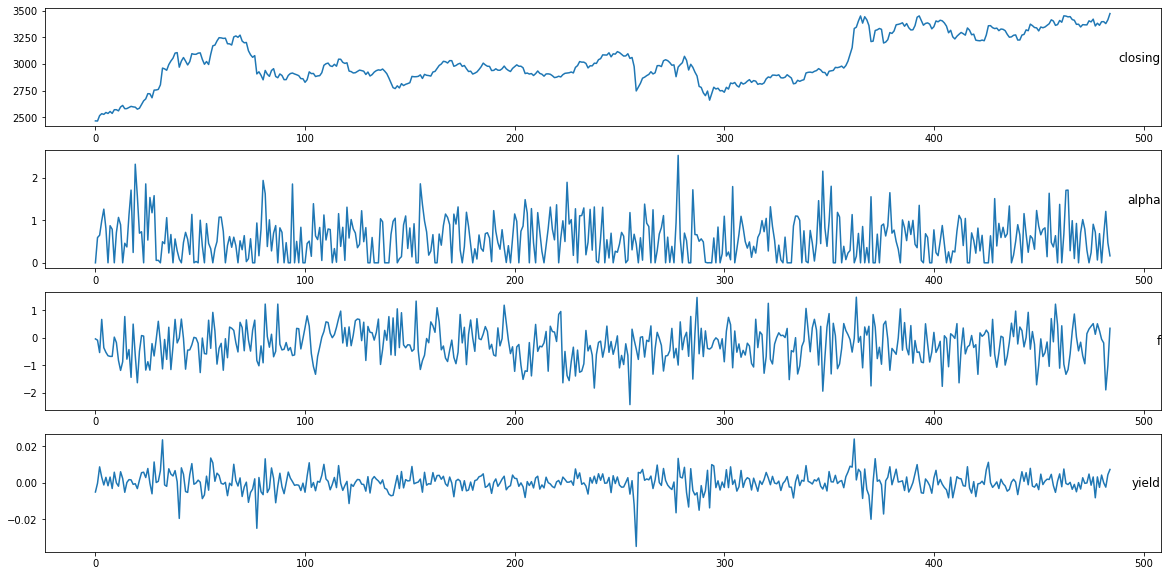

In [ ]:
groups = [1, 2, 3, 4]
i = 1
# plot each column
plt.figure(figsize=(20,10))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [ ]:
df['date']=pd.to_datetime(df['date'])

In [ ]:
df.rename(columns={'date':'ds', 'alpha': 'add1', 'f': 'add2','yield': 'add3','closing': 'y'}, inplace=True)

In [ ]:
# df = df[["ds","y"]]

In [ ]:
from fbprophet import Prophet

In [ ]:
cutoff = -10
train = df[:cutoff]
test = df[cutoff:]

In [ ]:
train

,ds,y,add1,add2,add3
0,2019-01-02,2465.29,6.940000e-18,-0.042300,-0.005010
1,2019-01-03,2464.36,5.946000e-01,-0.089980,-0.000160
2,2019-01-04,2514.87,6.498620e-01,-0.537240,0.008811
3,2019-01-07,2533.09,9.887840e-01,0.663702,0.003135
4,2019-01-08,2526.46,1.263934e+00,-0.361710,-0.001140
...,...,...,...,...,...
470,2020-12-11,3347.19,7.066990e-01,-0.162570,-0.003370
471,2020-12-14,3369.12,1.018025e+00,-0.654210,0.002836
472,2020-12-15,3367.23,7.916130e-01,-0.943640,-0.000240
473,2020-12-16,3366.98,2.973600e-01,0.146866,-0.000032


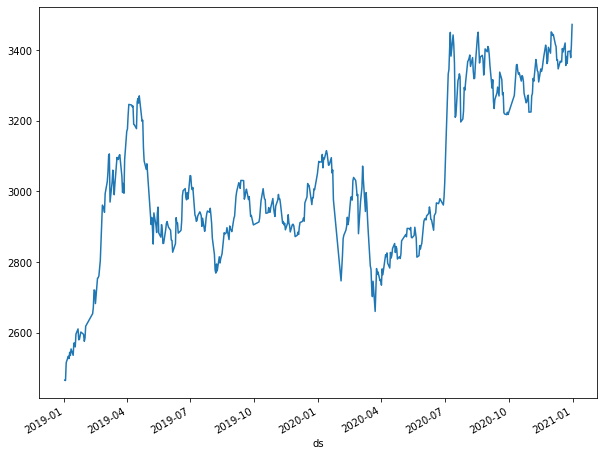

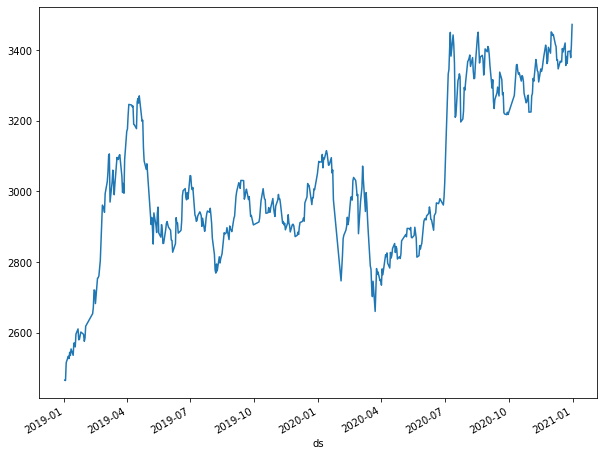

In [ ]:
df.set_index('ds').y.plot().figure

In [ ]:
target = pd.DataFrame()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


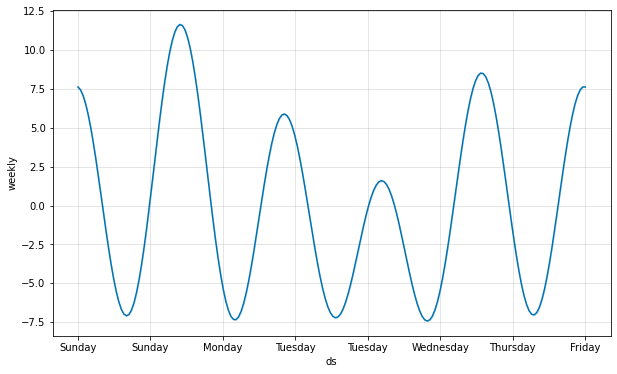

In [ ]:
from fbprophet.plot import plot_seasonality
m = Prophet(interval_width=0.95, changepoint_prior_scale=0.03955)
m.add_regressor('add1')
m.add_regressor('add2')
m.add_regressor('add3')
m.add_seasonality(
    name='weekly', period=5, fourier_order=5) #, prior_scale=0.1
m.add_country_holidays(country_name='China')
m.fit(train)
a = plot_seasonality(m, "weekly")

In [ ]:
future = test # m.make_future_dataframe(periods=15) df.iloc[:,0:1]
forecast = m.predict(future)  
target = pd.merge(target, forecast.set_index('ds'), how='outer', left_index=True, right_index=True)

In [ ]:
# !pip uninstall scikit-learn -y

# !pip install -U scikit-learn

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test.y,forecast.yhat)

527.971539924999

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test.y,forecast.yhat)

0.004654254690247964

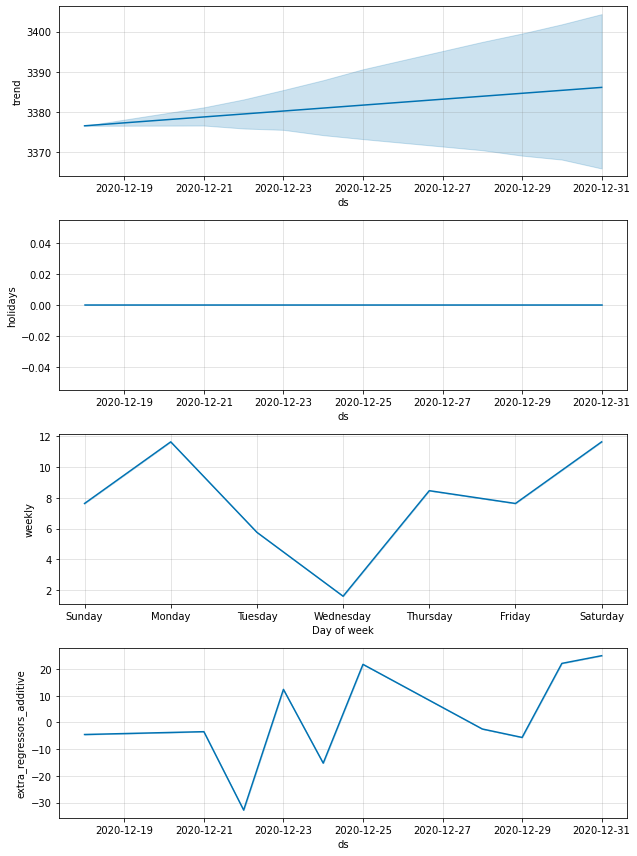

In [ ]:
fig = m.plot_components(forecast)

In [ ]:
import plotly.graph_objs as go

import pandas as pd

trace_test = go.Scatter(
    x=test.ds,
    y=test.y,
    name="Closing(Test)",
    line=dict(color="#f9ab00"),
    opacity=0.8,
    # mode='lines+markers'
)

trace_pred = go.Scatter(
    x=forecast.ds,
    y=forecast.yhat,
    name="Closing(Pred)",
    line=dict(color="#0f9d58"),
    opacity=0.8,
    # mode='lines+markers'
)

data = [trace_test, trace_pred]

layout = dict(
    title = "Prophet Prediction Result - SHA"
)

fig = go.Figure(data = data, layout = layout)

config = {
  'toImageButtonOptions': { 'height': 500, 'width': 800, }
}

fig.show(config=config)

In [ ]:
forecast.to_csv('/content/drive/MyDrive/stock/SHA_forecast.csv')
test.to_csv('/content/drive/MyDrive/stock/SHA_test.csv')